In [91]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import jpegio
from PIL import Image
%matplotlib inline

In [92]:
cover_path = 'E:/JPEG_cover/ALASKA_v2_JPG_256_QF100_COLOR'
stego_path = 'E:/SSE_stego/SSE_stego_100'

In [93]:
def calc_residual(stego, cover):
    residual_cb = np.abs(stego.coef_arrays[1].astype(np.int16) - cover.coef_arrays[1][0:128, 0:128].astype(np.int16)).astype(np.uint8)
    residual_cr = np.abs(stego.coef_arrays[2].astype(np.int16) - cover.coef_arrays[2][0:128, 0:128].astype(np.int16)).astype(np.uint8)
    return residual_cb, residual_cr

In [94]:
def show_img(cover_path: str, stego_path: str, count: int, multiple: int):
    fig = plt.figure(figsize=(25, 25))

    stego_filenames = os.listdir(stego_path)
    stego_filenames = list(filter(lambda x: x if x[-4:] == '.jpg' else None, stego_filenames))

    if count == -1:
        count = len(stego_filenames)

    i = 0
    for filename in stego_filenames[:count]:
        stego = jpegio.read(os.path.join(stego_path, filename))
        filename_c = filename[:-7] + '.jpg'
        cover = jpegio.read(os.path.join(cover_path, filename_c))

        residual_cb, residual_cr = calc_residual(stego, cover)
        residual_cb *= multiple

        ax = fig.add_subplot(5, 5, i+1)
        ax.set_title(filename)
        ax.plot(5, 5)
        ax.imshow(residual_cb, cmap = 'gray')
        i += 1

    i=0
    fig_2 = plt.figure(figsize=(25, 25))
    for filename in stego_filenames[:count]:
        stego = jpegio.read(os.path.join(stego_path, filename))
        filename_c = filename[:-7] + '.jpg'
        cover = jpegio.read(os.path.join(cover_path, filename_c))

        residual_cb, residual_cr = calc_residual(stego, cover)
        residual_cr *= multiple

        bx = fig_2.add_subplot(5, 5, i+1)
        bx.set_title(filename)
        bx.plot(5, 5)
        bx.imshow(residual_cr, cmap = 'gray')
        i += 1



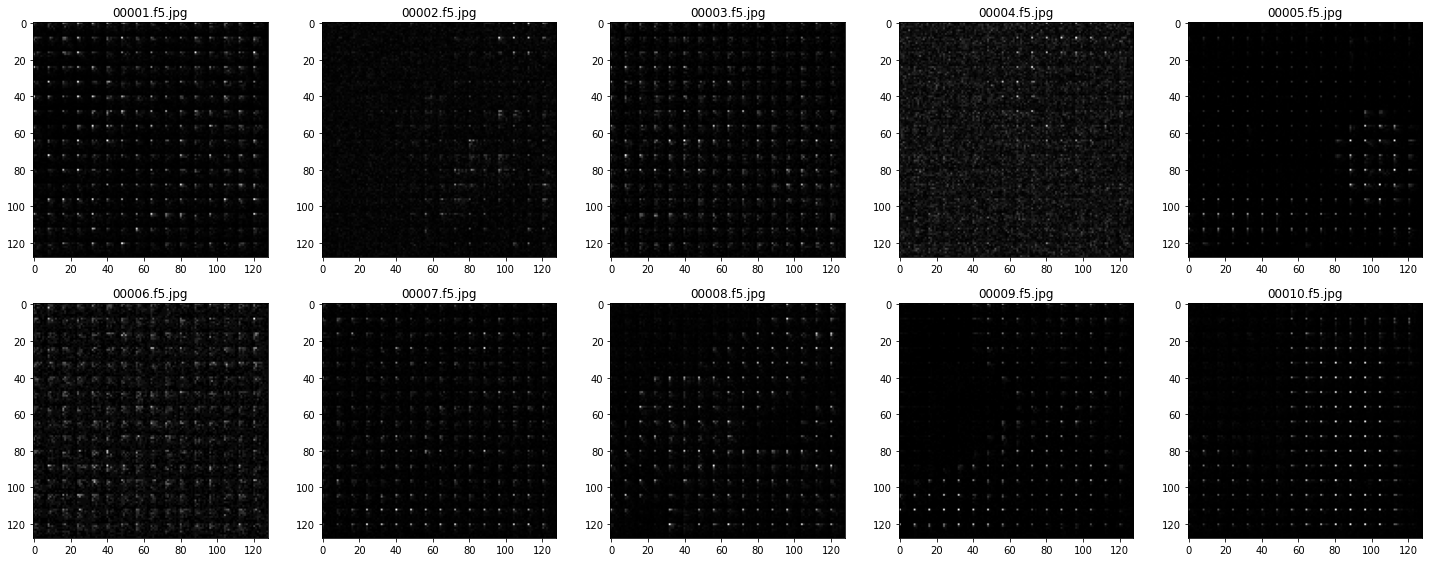

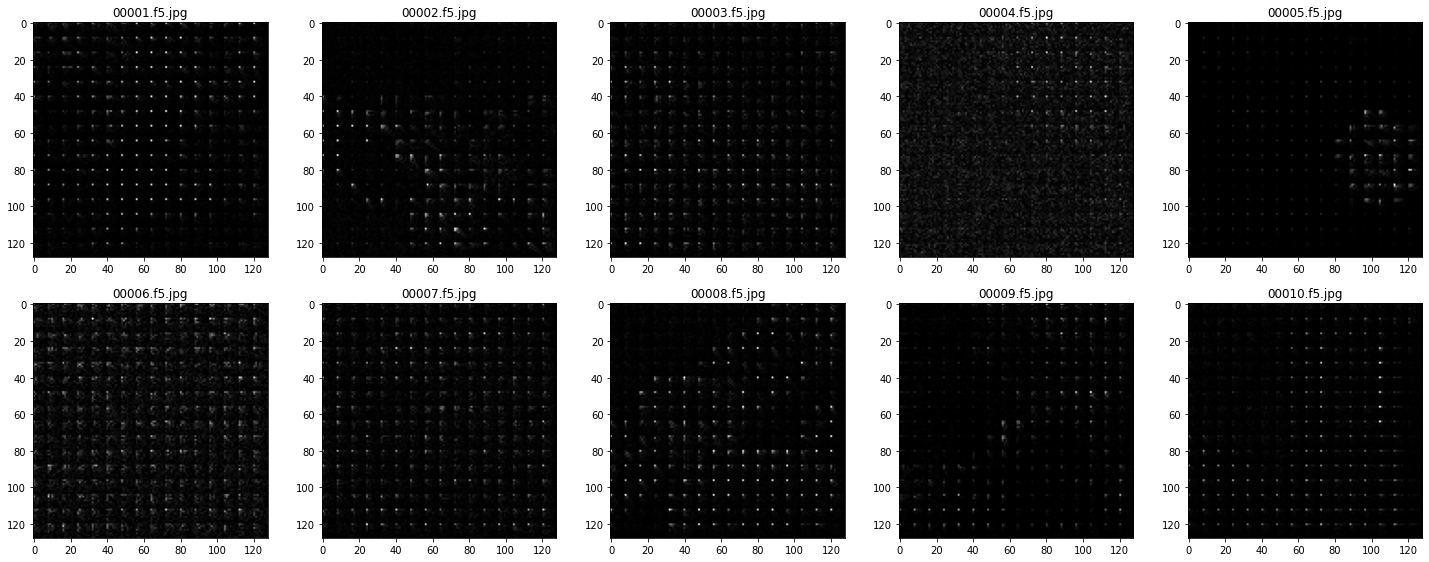

In [95]:
show_img(cover_path, stego_path, 10, 1)